## Polytope Climate-DT example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [9]:
%%capture cap
%run ../desp-authentication.py

Exception: File `'../desp-authentication.py'` not found.

This will generate a token that can then be used by earthkit and polytope.

In [10]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [11]:
import earthkit.data
import earthkit.plots
import earthkit.regrid
from polytope.api import Client

In [12]:
client = Client(
    address="polytope.lumi.apps.dte.destination-earth.eu")

request = {
    'activity': 'ScenarioMIP',
    'class': 'd1',
    'dataset': 'climate-dt',
    'date': '20200102',
    'experiment': 'SSP3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'IFS-NEMO',
    'param': '134/165/166',
    'realization': '1',
    'resolution': 'standard',
    'stream': 'clte',
    'time': '0100', # '0100/0200/0300/0400/0500/0600'
    'type': 'fc'
}

file = client.retrieve("destination-earth", request, "data/climate-dt-earthkit-example.grib") 

2025-07-22 21:17:55 - INFO - Key read from /Users/maes/.polytopeapirc
2025-07-22 21:17:55 - INFO - Sending request...
{'request': 'activity: ScenarioMIP\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20200102'\n"
            'experiment: SSP3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            'levtype: sfc\n'
            'model: IFS-NEMO\n'
            'param: 134/165/166\n'
            "realization: '1'\n"
            'resolution: standard\n'
            'stream: clte\n'
            "time: '0100'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-07-22 21:17:55 - INFO - Polytope user key found in session cache for user maes
2025-07-22 21:17:56 - INFO - Request accepted. Please poll ./26a20bcd-18a6-4412-a621-7e8c44d06cce for status
2025-07-22 21:17:56 - INFO - Polytope user key found in session cache for user maes
2025-07-22 21:17:56 - INFO - Checking request status (26a20bcd-18a6-4412-a621-7e8c44d06cce)...
2025-0

In [13]:
data = earthkit.data.from_source("file", "data/climate-dt-earthkit-example.grib") 

In [14]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200102,100,0,fc,None,healpix
1,ecmf,10u,heightAboveGround,10,20200102,100,0,fc,None,healpix
2,ecmf,10v,heightAboveGround,10,20200102,100,0,fc,None,healpix


/opt/homebrew/Caskroom/miniforge/base/envs/earthkit/lib/python3.13/site-packages/earthkit/plots/components/subplots.py:562: UserWarning: pcolormesh failed with raw data, attempting interpolation to structured grid with default interpolation options.
  warnings.warn(


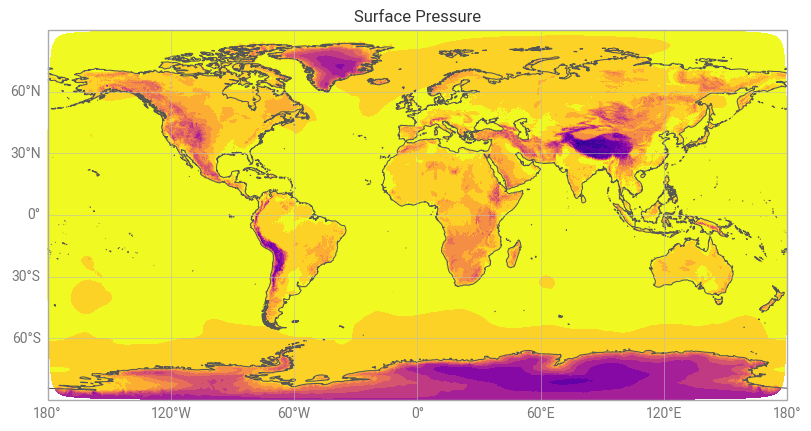

In [15]:
chart = earthkit.plots.Map(extent=[-180, 180, -90, 90])
chart.grid_cells(
    data[0],
)

chart.title("Surface Pressure")
chart.coastlines()
chart.gridlines()
chart.show()

In [16]:
# Regrid t=from healpix for conversion to xarray
data_latlon = earthkit.regrid.interpolate(data, out_grid={"grid": [1,1]}, method="linear")
# Convert data to xarray
data_latlon.to_xarray()

<xarray.Dataset> Size: 2MB
Dimensions:    (latitude: 181, longitude: 360)
Coordinates:
  * latitude   (latitude) float64 1kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    10u        (latitude, longitude) float64 521kB ...
    10v        (latitude, longitude) float64 521kB ...
    sp         (latitude, longitude) float64 521kB ...
Attributes:
    class:        d1
    stream:       clte
    levtype:      sfc
    type:         fc
    expver:       0001
    date:         20200102
    time:         100
    Conventions:  CF-1.8
    institution:  ECMWF